###What is Colab?
Colab, or "Colaboratory", allows you to write and execute Python in your browser, with

* Zero configuration required
* Access to GPUs free of charge
* Easy sharing

##Printing a Statement

To dislpay "Hello, AI Enthusiasts!" as output.

Code: `print("Hello, AI Enthusiasts!")`

Output: Hello, AI Enthusiasts!

In [30]:
print("Hello")

Hello


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Variables & Data Types
In Python, variables are used to store data values, and they are dynamically typed, meaning you don’t need to declare their type explicitly. Data types in Python include integers, floats, strings, lists, tuples, dictionaries, and more, each serving different purposes in programming.

### Adding 2 numbers

In [20]:
x = "abi "
y = "string "

print(x+y)

abi string 


##Functions
In Python, functions are reusable blocks of code that perform a specific task and are defined using the `def` keyword.

In [24]:
def greetings(name, num):
    return "Hello, " + name + "! " + num

print(greetings("Abi", "3"))

Hello, Abi! 3


## Packages

* Python has pre-built libraries.
* Avoids writing everything from scratch!

###1. Numpy Example:
This example demonstrates how to import numpy and create a basic array.

In [25]:
# Importing numpy package
import numpy as np

# Creating a 1D numpy array
array = np.array([1, 2, 3, 4, 5])

# Print the array
print("Numpy Array:", array)

Numpy Array: [1 2 3 4 5]


###2. OpenCV Example:
This example shows how to import opencv (OpenCV) and read an image.

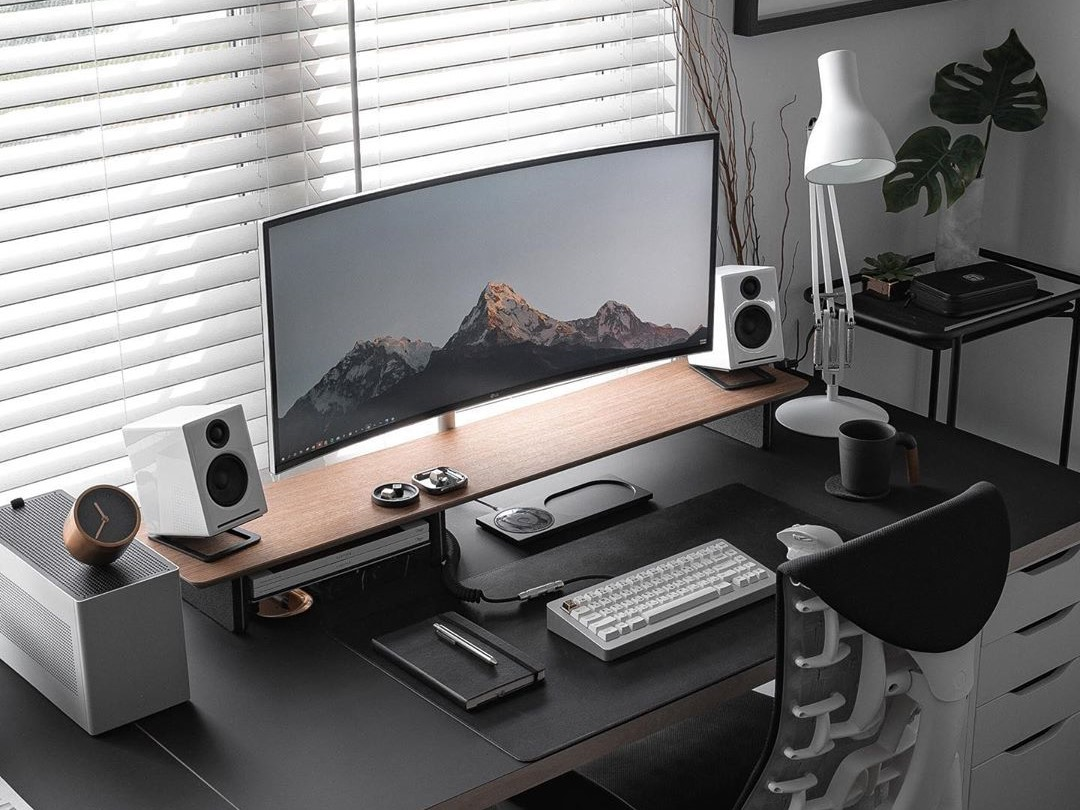

In [26]:
# Importing opencv package
import cv2
from google.colab.patches import cv2_imshow

# Reading an image using OpenCV
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Data/Sample_Image_office.jpg')

# Show the image in a window
cv2_imshow(image)

# Wait for a key press and close the window
# cv2.waitKey(0)
# cv2.destroyAllWindows()

##Capturing from Webcam

In [27]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


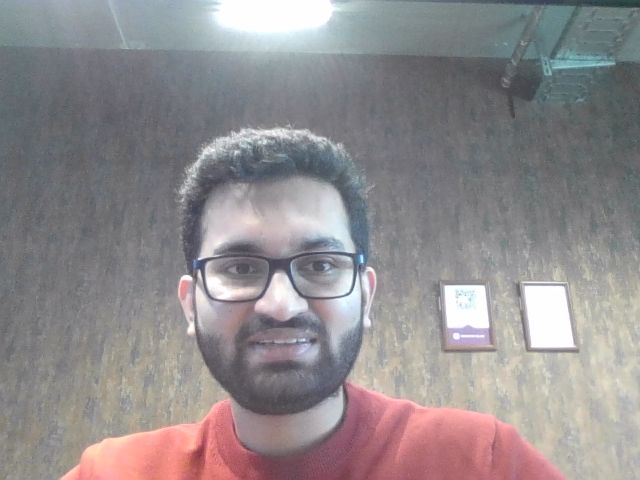

In [29]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))